In [1]:
%run header.py data/ASIC-2-FPGA

# Preliminary observation

- design space on ASIC
- design space on FPGA
- direct mapping
- direct mapping with tolerance
- direct mapping with tolerance and equal latency

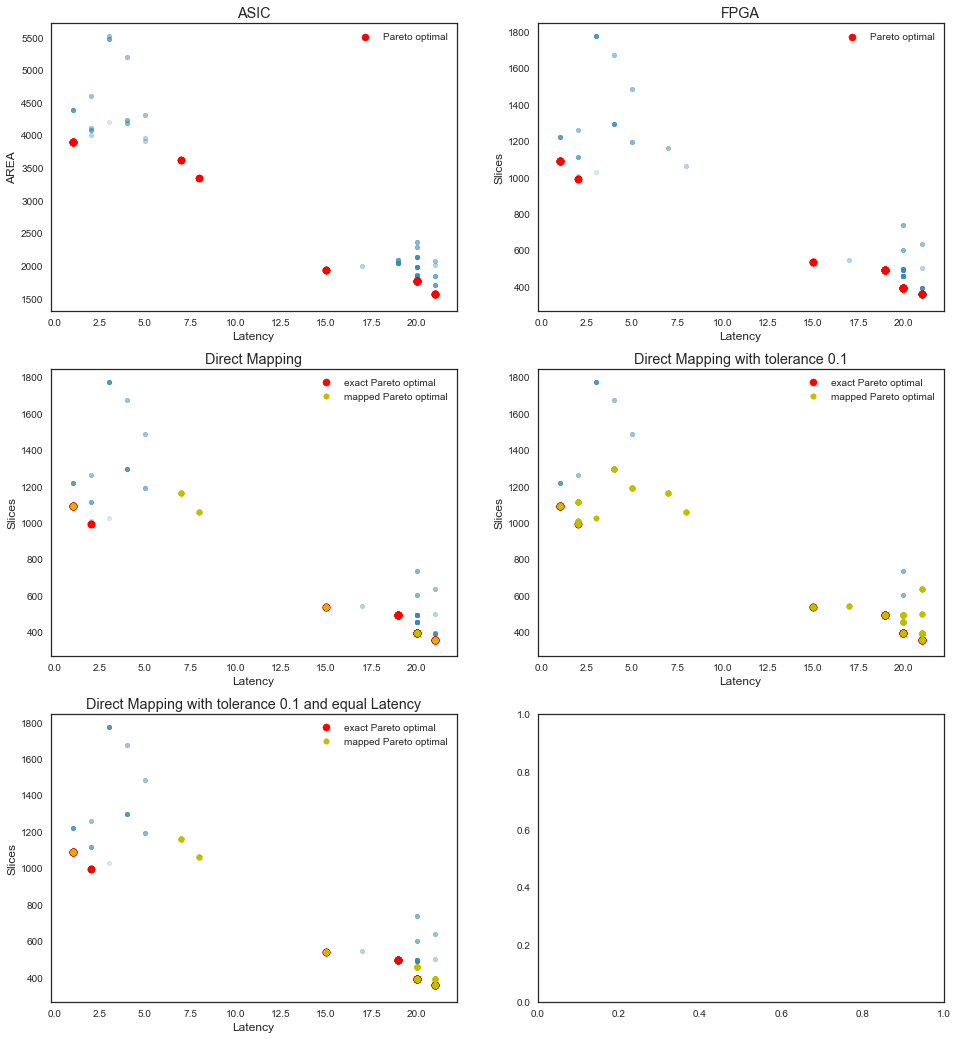

In [2]:
dm.main(df, tolerance=0.1, plot_figure=True)

# Save direct mapping results to files

In [3]:
l_dm, l_dm_tol, l_dm_tol_l = list(), list(), list()

# read the results
tolerance = 0.1
for bench in benchmarks:
    df = gd.data_v4[bench]
    dm.main(df, tolerance=tolerance, plot_figure=False)
    l_dm.append(list(dm.results_no_tol.values()))
    l_dm_tol.append(list(dm.results_tol.values()))
    l_dm_tol_l.append(list(dm.results_tol_eq_l.values()))

# save as DataFrame
columns = list(dm.results_no_tol.keys())
df_dm = pd.DataFrame(l_dm, index=benchmarks, columns=columns)
df_dm_tol = pd.DataFrame(l_dm_tol, index=benchmarks, columns=columns)
df_dm_tol_l = pd.DataFrame(l_dm_tol_l, index=benchmarks, columns=columns)

# change index to column
df_dm = df_dm.reset_index().rename(columns={'index': 'benchmark'})
df_dm_tol = df_dm_tol.reset_index().rename(columns={'index': 'benchmark'})
df_dm_tol_l = df_dm_tol_l.reset_index().rename(columns={'index': 'benchmark'})

# save to csv
df_dm.to_csv('dm_v4.csv', index=False)
df_dm_tol.to_csv(f'dm_v4_tol_{int(tolerance*100):02d}.csv', index=False)
df_dm_tol_l.to_csv(f'dm_v4_tol_{int(tolerance*100):02d}_l.csv', index=False)

In [7]:
l_dm, l_dm_tol, l_dm_tol_l = list(), list(), list()

# read the results
tolerance = 0.05
for bench in benchmarks:
    df = gd.data_v4[bench]
    dm.main(df, tolerance=tolerance, plot_figure=False)
    l_dm.append(list(dm.results_no_tol.values()))
    l_dm_tol.append(list(dm.results_tol.values()))
    l_dm_tol_l.append(list(dm.results_tol_eq_l.values()))

# save as DataFrame
columns = list(dm.results_no_tol.keys())
df_dm = pd.DataFrame(l_dm, index=benchmarks, columns=columns)
df_dm_tol = pd.DataFrame(l_dm_tol, index=benchmarks, columns=columns)
df_dm_tol_l = pd.DataFrame(l_dm_tol_l, index=benchmarks, columns=columns)

# change index to column
df_dm = df_dm.reset_index().rename(columns={'index': 'benchmark'})
df_dm_tol = df_dm_tol.reset_index().rename(columns={'index': 'benchmark'})
df_dm_tol_l = df_dm_tol_l.reset_index().rename(columns={'index': 'benchmark'})

# save to csv
df_dm.to_csv('dm_v4.csv', index=False)
df_dm_tol.to_csv(f'dm_v4_tol_{int(tolerance*100):02d}.csv', index=False)
df_dm_tol_l.to_csv(f'dm_v4_tol_{int(tolerance*100):02d}_l.csv', index=False)

# Read the csv files

In [4]:
pd.read_csv('dm_v4.csv')

,benchmark,adrs_ave,adrs_max,adrs_ave_rms,adrs_max_rms,hypervolume,dominance,cardinality
0,adpcm_encoder,0.0251,0.0978,0.0261,0.0875,0.2722,0.6667,45
1,aes,0.0043,0.0216,0.0319,0.1593,0.9669,0.8000,6
2,ann,0.0142,0.0600,0.0891,0.5433,0.9356,0.5556,13
3,average,0.0000,0.0000,0.0000,0.0000,0.4526,1.0000,72
4,decimation,0.0541,0.1482,0.0404,0.1479,0.8890,0.2857,4
5,fft_fixed,0.0583,0.1154,0.0383,0.0856,0.7895,0.0000,40
6,fir,0.0000,0.0000,0.0000,0.0000,0.3377,1.0000,77
7,idct,0.0257,0.0522,0.0281,0.0594,0.7248,0.5000,13
8,interpolation,0.2575,0.3985,0.1646,0.2454,0.5816,0.1429,19
9,kasumi,0.1375,0.2559,0.1399,0.2621,0.7833,0.2857,9


In [5]:
pd.read_csv('dm_v4_tol_10.csv')

,benchmark,adrs_ave,adrs_max,adrs_ave_rms,adrs_max_rms,hypervolume,dominance,cardinality
0,adpcm_encoder,0.0000,0.0000,0.0000,0.0000,0.3447,1.0000,174
1,aes,0.0000,0.0000,0.0000,0.0000,0.6741,1.0000,10
2,ann,0.0075,0.0488,0.0082,0.0369,0.3983,0.6667,457
3,average,0.0000,0.0000,0.0000,0.0000,0.2961,1.0000,92
4,decimation,0.0100,0.0551,0.0124,0.0440,0.9872,0.7143,10
5,fft_fixed,0.0000,0.0000,0.0000,0.0000,0.5822,1.0000,832
6,fir,0.0000,0.0000,0.0000,0.0000,0.1056,1.0000,222
7,idct,0.0126,0.0504,0.0031,0.0122,0.2512,0.7500,258
8,interpolation,0.0000,0.0000,0.0000,0.0000,0.3620,1.0000,1925
9,kasumi,0.1375,0.2559,0.1399,0.2621,0.5929,0.2857,34


In [6]:
pd.read_csv('dm_v4_tol_10_l.csv')

,benchmark,adrs_ave,adrs_max,adrs_ave_rms,adrs_max_rms,hypervolume,dominance,cardinality
0,adpcm_encoder,0.0251,0.0978,0.0240,0.0750,0.2722,0.6667,90
1,aes,0.0043,0.0216,0.0319,0.1593,0.9669,0.8000,6
2,ann,0.0142,0.0600,0.0788,0.5433,0.9359,0.5556,33
3,average,0.0000,0.0000,0.0000,0.0000,0.4418,1.0000,74
4,decimation,0.0541,0.1482,0.0404,0.1479,0.8890,0.2857,4
5,fft_fixed,0.0457,0.1062,0.0307,0.0856,0.8014,0.3333,78
6,fir,0.0000,0.0000,0.0000,0.0000,0.3377,1.0000,77
7,idct,0.0257,0.0522,0.0281,0.0594,0.7075,0.5000,26
8,interpolation,0.2257,0.3985,0.1446,0.2454,0.6029,0.2857,50
9,kasumi,0.1375,0.2559,0.1399,0.2621,0.7806,0.2857,14
